# Basics

In [ ]:
import graph_tool.all as gt
import numpy as np
import scipy.sparse

import matplotlib.pyplot as plt

## Creating graphs

Submodules involved: 
- collections.ns 
- utils 

![Simple Network](../figures/tikz_network.png)

`graph-tool` provides the following ways: 

In [6]:
import graph_tool.all as gt

### Edge list

/nb/yuanming/miniconda3/envs/gt/lib/python3.13/site-packages/graph_tool/draw/cairo_draw.py:545: UserWarning: Unknown edge attribute: font_color
  warnings.warn(f"Unknown {kind} attribute: " + str(k), UserWarning)
/nb/yuanming/miniconda3/envs/gt/lib/python3.13/site-packages/graph_tool/draw/cairo_draw.py:545: UserWarning: Unknown edge attribute: arrow_size
  warnings.warn(f"Unknown {kind} attribute: " + str(k), UserWarning)


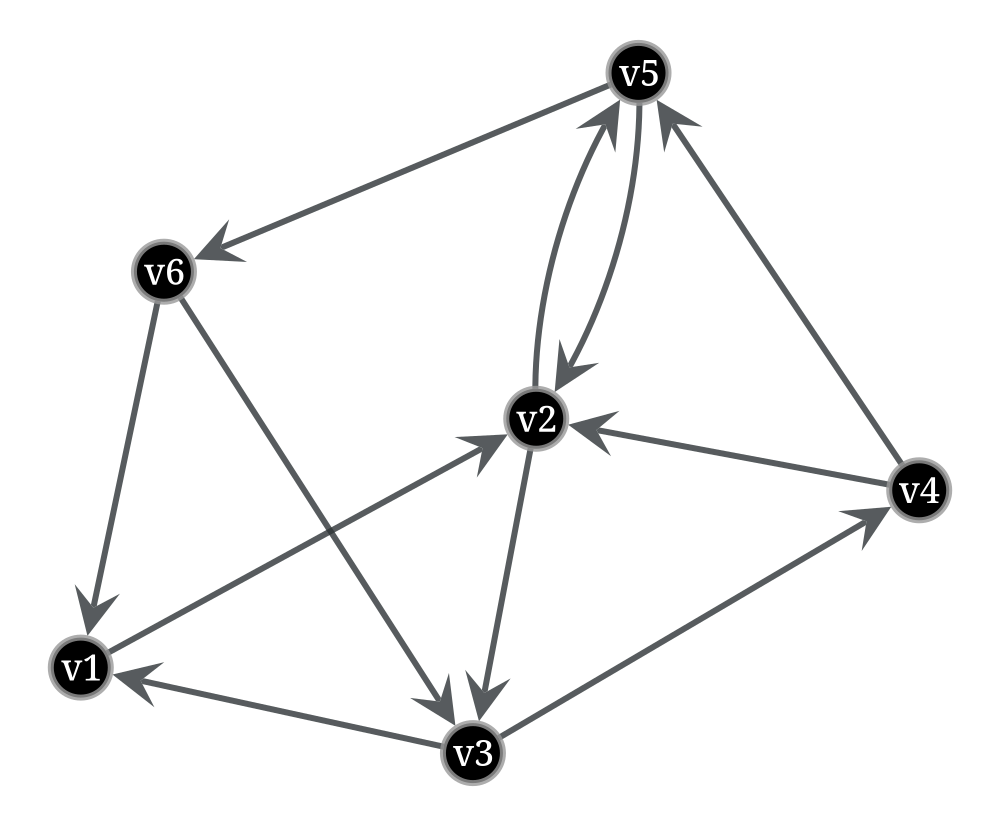

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa3579a42b0, at 0x7fa357869470>

In [7]:
# edge list 
elist = [
    (0, 1),  # v1 → v2
    (1, 2),  # v2 → v3
    (2, 3),  # v3 → v4
    (3, 4),  # v4 → v5
    (4, 5),  # v5 → v6
    (5, 0),  # v6 → v1
    (1, 4),  # v2 → v5
    (2, 0),  # v3 → v1
    (4, 1),  # v5 → v2
    (3, 1),  # v4 → v2
    (5, 2),  # v6 → v3
]


# Create directed graph
g = gt.Graph(directed=True)

# Add 6 vertices
g.add_vertex(6)

# Add edges from list
g.add_edge_list(elist)

# Add labels (v1 to v6)
label_prop = g.new_vertex_property("string")
for i, label in enumerate(["v1", "v2", "v3", "v4", "v5", "v6"]):
    label_prop[g.vertex(i)] = label

# Draw the graph
gt.graph_draw(
    g,
    vertex_text=label_prop,
    vertex_fill_color=[0, 0, 0, 1],  # black fill
    vertex_font_color=[1, 1, 1, 1],  # white label text
    vertex_size=30,
    edge_arrow_size=10,
    output_size=(500, 500)
)

### Adjacency list

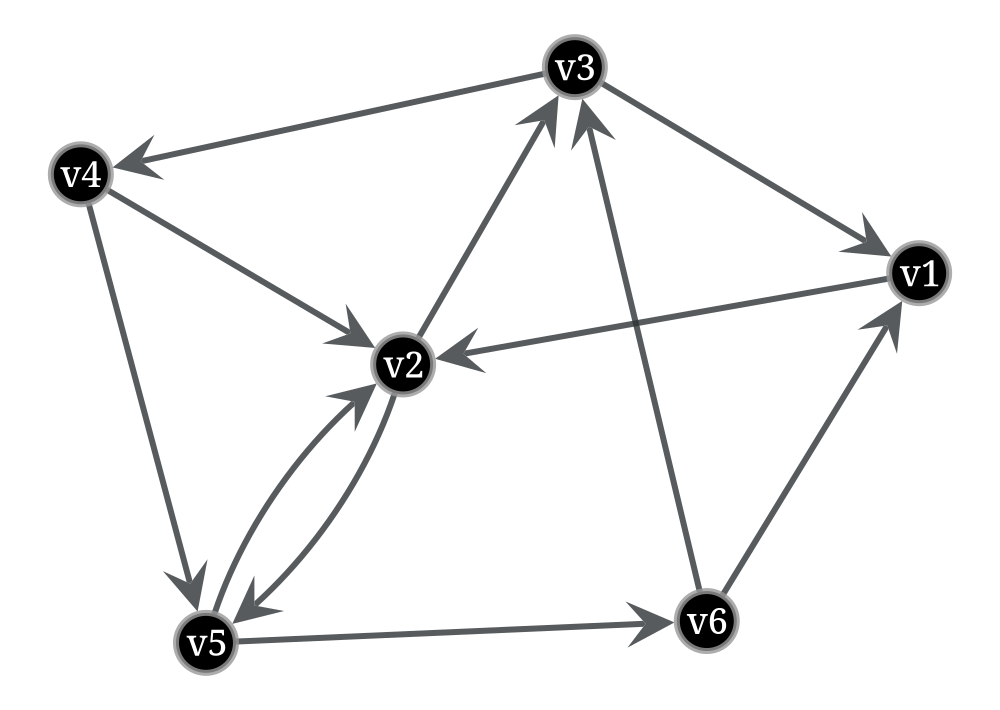

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa35bdef6f0, at 0x7fa357869630>

In [8]:
# adjacency list 
adj = {
    0: [1],         # v1 → v2
    1: [2, 4],      # v2 → v3, v5
    2: [3, 0],      # v3 → v4, v1
    3: [4, 1],      # v4 → v5, v2
    4: [5, 1],      # v5 → v6, v2
    5: [0, 2],      # v6 → v1, v3
}

def elist():
    for u, vw in adj.items():
        k = 0
        for v in vw:
            k += 1
            yield u, v
        if k == 0:
            yield u, None  # include isolated nodes
            

g = gt.Graph(directed=True)
g.add_vertex(6)  # manually ensure all 6 nodes exist
g.add_edge_list(elist())

# Add labels (v1 to v6)
label_prop = g.new_vertex_property("string")
for i, label in enumerate(["v1", "v2", "v3", "v4", "v5", "v6"]):
    label_prop[g.vertex(i)] = label

# Draw the graph
gt.graph_draw(
    g,
    vertex_text=label_prop,
    vertex_fill_color=[0, 0, 0, 1],
    vertex_font_color=[1, 1, 1, 1],
    vertex_size=30,
    edge_arrow_size=10,
    output_size=(500, 500)
)


### Sparse Matrix

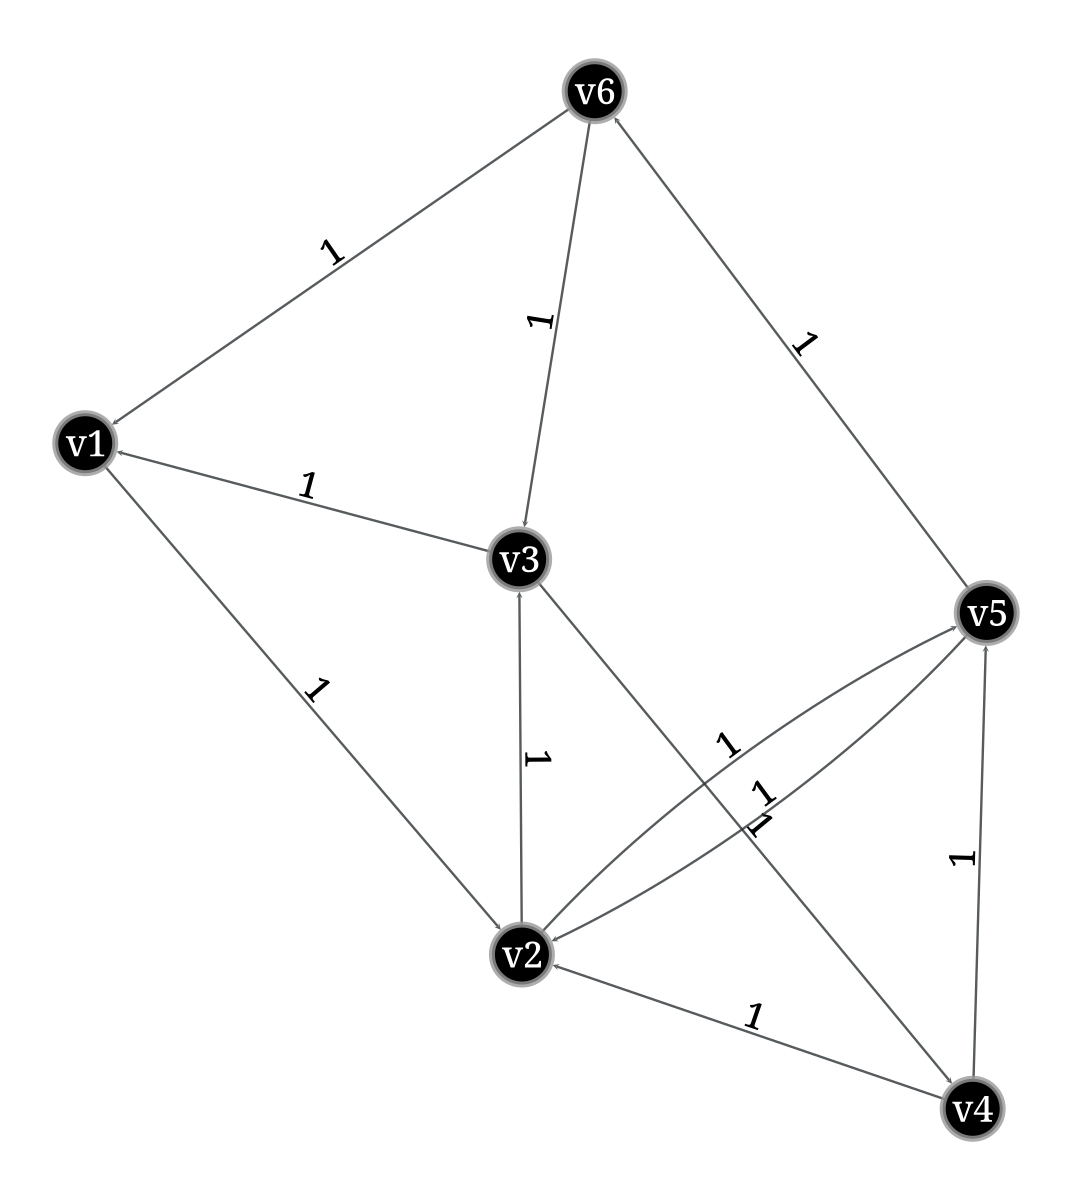

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fa3579a42b0, at 0x7fa357a1c600>

In [ ]:


# sparse matrix 


# Create a 6x6 sparse adjacency matrix (weight=1 if edge exists)
adj_matrix = np.array([
    [0, 1, 0, 0, 0, 0],  # v1 → v2
    [0, 0, 1, 0, 1, 0],  # v2 → v3, v5
    [1, 0, 0, 1, 0, 0],  # v3 → v1, v4
    [0, 1, 0, 0, 1, 0],  # v4 → v2, v5
    [0, 1, 0, 0, 0, 1],  # v5 → v2, v6
    [1, 0, 1, 0, 0, 0],  # v6 → v1, v3
])

# Convert to sparse COO matrix
a = scipy.sparse.coo_array(adj_matrix)

# Extract row (source), col (target), data (weight)
s, t, w = scipy.sparse.find(a)

# Combine into edge list with weights
es = np.array([s, t, w]).T  # shape: (num_edges, 3)

# Create directed graph and add edges with weights
g = gt.Graph(directed=True)
g.add_vertex(6)
weight = g.new_edge_property("int")
g.add_edge_list(es, eprops=[weight])
g.edge_properties["weight"] = weight

# Add vertex labels
label_prop = g.new_vertex_property("string")
for i in range(6):
    label_prop[g.vertex(i)] = f"v{i+1}"

# Draw the graph
gt.graph_draw(
    g,
    vertex_text=label_prop,
    edge_text=weight,
    vertex_fill_color=[0, 0, 0, 1],
    vertex_font_color=[1, 1, 1, 1],
    vertex_size=30,
    edge_pen_width=1.2,
    edge_arrow_size=10,
    output_size=(600, 600)
)


### Loading graph from file

In [ ]:
# g.save("data/graph.xml.gz")

`graph-tool` has a repo of networks: https://networks.skewed.de/ 

## Property maps in `graph-tool`

Property maps are a way of associating additional information to the vertices, edges, or to the graph itself. There are thus three types of property maps: vertex, edge, and graph. They are handled by the classes [`VertexPropertyMap`](https://graph-tool.skewed.de/static/docs/stable/autosummary/graph_tool.VertexPropertyMap.html#graph_tool.VertexPropertyMap), [`EdgePropertyMap`](https://graph-tool.skewed.de/static/docs/stable/autosummary/graph_tool.EdgePropertyMap.html#graph_tool.EdgePropertyMap), and [`GraphPropertyMap`](https://graph-tool.skewed.de/static/docs/stable/autosummary/graph_tool.GraphPropertyMap.html#graph_tool.GraphPropertyMap). Each created property map has an associated *value type*, which must be chosen from the predefined set: 

In [ ]:
# from gt file 

## Iterating over nodes and edges

### Iterating over neighbors 

### Advanced iteration 

## Plotting graphs 